# NBA Shooting Data

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.read_csv('nba_players_shooting.csv', index_col=0)

,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
INDEX,,,,,,
0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE
1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE
2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE
3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE
4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE
...,...,...,...,...,...,...
771,Trae Young,23.952742,15.324875,"(25, 29)",Russell Westbrook,MISSED
772,Trae Young,6.221766,30.756008,"(25, 29)",Seth Curry,MISSED
773,Trae Young,16.397467,27.660323,"(25, 29)",Chris Paul,MISSED


#### Data Dictionary

|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the basket in ft  |
|Y        |float     |Vertical distance of the shot taken from the basket in ft    |
|RANGE    |String    |Radius range of the shot taken from the basket in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |

In [2]:
df = pd.read_csv('nba_players_shooting.csv', index_col=0)
df['RANGE'] = df.RANGE.astype("category")
df['RANGE'] = df.RANGE.cat.reorder_categories(['(0, 4)', '(5, 9)', '(10, 14)', '(15, 19)', '(20, 24)', '(25, 29)'], ordered=True)

# Shooting efficiency
What is the overall efficiency for these players?

In [3]:
misses = df[df['SCORE'] == 'MISSED'].sort_values('SHOOTER').groupby('SHOOTER')['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values('SHOOTER').groupby('SHOOTER')['X'].count()
df_pct = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct.reset_index(inplace=True)
df_pct['total_shots'] = df_pct.sum(axis=1)
df_pct['efficiency'] = round(df_pct['made_shots'] / df_pct['total_shots'] * 100, 2)
df_pct[['SHOOTER', 'efficiency']].sort_values('efficiency', ascending=False)

,SHOOTER,efficiency
2,Seth Curry,57.82
0,Chris Paul,48.61
3,Trae Young,43.16
1,Russell Westbrook,33.33


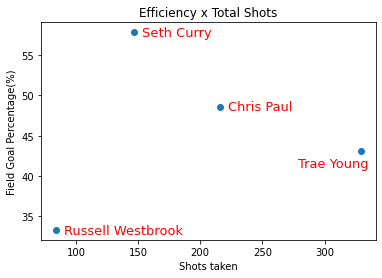

In [4]:
plt.scatter(df_pct['total_shots'], 
            df_pct['efficiency'],
               )
for i in range(df_pct.shape[0]):
    if df_pct['SHOOTER'][i] != 'Trae Young':
        plt.text(x=df_pct['total_shots'][i]+6,
              y=df_pct['efficiency'][i]-0.5,
              s=df_pct['SHOOTER'][i],
              fontdict=dict(color='red',size=13))
    else:
        plt.text(x=df_pct['total_shots'][i]-50,
              y=df_pct['efficiency'][i]-2,
              s=df_pct['SHOOTER'][i],
              fontdict=dict(color='red',size=13))
plt.title('Efficiency x Total Shots')
plt.xlabel('Shots taken')
plt.ylabel('Field Goal Percentage(%)')
plt.show()

By total shooting efficiency, Seth Curry leads all players with a good margin. However, what is the efficiency for these players for each different range presented in the dataset?

In [5]:
df[df['SCORE'] == 'MADE'].sort_values(['SHOOTER', 'RANGE']).groupby(['SHOOTER', 'RANGE'])['X'].count()
misses = df[df['SCORE'] == 'MISSED'].sort_values(['SHOOTER', 'RANGE']).groupby(['SHOOTER', 'RANGE'])['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values(['SHOOTER', 'RANGE']).groupby(['SHOOTER', 'RANGE'])['X'].count()
df_pct_range = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct_range.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct_range.reset_index(inplace=True)
df_pct_range['total_shots'] = df_pct_range.sum(axis=1)
df_pct_range['efficiency'] = round(df_pct_range['made_shots'] / df_pct_range['total_shots'] * 100, 2)
df_pct_range.sort_values(['RANGE', 'efficiency'], ascending=[True, False])[['SHOOTER', 'RANGE', 'efficiency']]

,SHOOTER,RANGE,efficiency
0,Chris Paul,"(0, 4)",75.00
12,Seth Curry,"(0, 4)",68.75
18,Trae Young,"(0, 4)",52.38
6,Russell Westbrook,"(0, 4)",40.00
13,Seth Curry,"(5, 9)",66.67
1,Chris Paul,"(5, 9)",59.09
19,Trae Young,"(5, 9)",47.17
7,Russell Westbrook,"(5, 9)",11.11
8,Russell Westbrook,"(10, 14)",66.67
20,Trae Young,"(10, 14)",49.15


In [6]:
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('RANGE')['efficiency'].idxmax())][['SHOOTER', 'RANGE', 'efficiency']].sort_values('RANGE')

,SHOOTER,RANGE,efficiency
0,Chris Paul,"(0, 4)",75.00
13,Seth Curry,"(5, 9)",66.67
8,Russell Westbrook,"(10, 14)",66.67
15,Seth Curry,"(15, 19)",72.22
16,Seth Curry,"(20, 24)",66.67
17,Seth Curry,"(25, 29)",47.46


As we can see, Seth Curry is also dominating the efficiency by zone with excellent FG% in almost all ranges. Even for the ranges where he is not the leader, he still has good efficiency.

Lets see now what is the "hot zone" for each of the shooters!

In [7]:
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('SHOOTER')['efficiency'].idxmax())][['SHOOTER', 'RANGE', 'efficiency']].sort_values('RANGE')

,SHOOTER,RANGE,efficiency
0,Chris Paul,"(0, 4)",75.00
18,Trae Young,"(0, 4)",52.38
8,Russell Westbrook,"(10, 14)",66.67
15,Seth Curry,"(15, 19)",72.22


# Defensive impact
Which player allowed the fewest field goal makes?

In [7]:
df[df['SCORE'] == 'MISSED'].groupby(['DEFENDER'])['X'].count().reset_index().rename(columns={"X": "missed_shots_forced"}).sort_values('missed_shots_forced', ascending=False)

,DEFENDER,missed_shots_forced
1,Russell Westbrook,172
2,Seth Curry,106
0,Chris Paul,96
3,Trae Young,42


Russell Westbrook force the most missed shots while defending.
However, he could have just had more defensive possessions. So lets analyze the data and see which player allowed the lowest field goal percentage?

In [8]:
misses = df[df['SCORE'] == 'MISSED'].sort_values('DEFENDER').groupby('DEFENDER')['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values('DEFENDER').groupby('DEFENDER')['X'].count()
df_pct = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct.reset_index(inplace=True)
df_pct['total_shots'] = df_pct.sum(axis=1)
df_pct['opp_efficiency'] = round(df_pct['made_shots'] / df_pct['total_shots'] * 100, 2)
df_pct[['DEFENDER', 'opp_efficiency']].sort_values('opp_efficiency')

,DEFENDER,opp_efficiency
1,Russell Westbrook,25.86
2,Seth Curry,44.50
0,Chris Paul,51.27
3,Trae Young,73.08


As we can see, the order is the same for both stats. Again, Westbrook held his matchup to the lowest field goal percentage of all 4 players as defenders.

In [9]:
df[df['SCORE'] == 'MADE'].sort_values(['DEFENDER', 'RANGE']).groupby(['DEFENDER', 'RANGE'])['X'].count()
misses = df[df['SCORE'] == 'MISSED'].sort_values(['DEFENDER', 'RANGE']).groupby(['DEFENDER', 'RANGE'])['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values(['DEFENDER', 'RANGE']).groupby(['DEFENDER', 'RANGE'])['X'].count()
df_pct_range = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct_range.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct_range.reset_index(inplace=True)
df_pct_range['total_shots'] = df_pct_range.sum(axis=1)
df_pct_range['opp_efficiency'] = round(df_pct_range['made_shots'] / df_pct_range['total_shots'] * 100, 2)
df_pct_range.sort_values(['RANGE', 'opp_efficiency'])[['DEFENDER', 'RANGE', 'opp_efficiency']]

,DEFENDER,RANGE,opp_efficiency
6,Russell Westbrook,"(0, 4)",36.67
12,Seth Curry,"(0, 4)",53.33
0,Chris Paul,"(0, 4)",62.16
18,Trae Young,"(0, 4)",69.57
7,Russell Westbrook,"(5, 9)",31.82
1,Chris Paul,"(5, 9)",47.83
13,Seth Curry,"(5, 9)",53.33
19,Trae Young,"(5, 9)",61.90
8,Russell Westbrook,"(10, 14)",18.42
14,Seth Curry,"(10, 14)",46.15


Now, lets look at each different range and see who are the best defenders.

In [10]:
# lowest opposing field goal percentage
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('RANGE')['opp_efficiency'].idxmin())][['DEFENDER', 'RANGE', 'opp_efficiency']].sort_values('RANGE')

,DEFENDER,RANGE,opp_efficiency
6,Russell Westbrook,"(0, 4)",36.67
7,Russell Westbrook,"(5, 9)",31.82
8,Russell Westbrook,"(10, 14)",18.42
9,Russell Westbrook,"(15, 19)",23.40
10,Russell Westbrook,"(20, 24)",28.57
11,Russell Westbrook,"(25, 29)",24.32


In [11]:
# highest opposing field goal percentage
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('RANGE')['opp_efficiency'].idxmax())][['DEFENDER', 'RANGE', 'opp_efficiency']].sort_values('RANGE')

,DEFENDER,RANGE,opp_efficiency
18,Trae Young,"(0, 4)",69.57
19,Trae Young,"(5, 9)",61.90
20,Trae Young,"(10, 14)",75.00
21,Trae Young,"(15, 19)",67.57
22,Trae Young,"(20, 24)",93.33
23,Trae Young,"(25, 29)",78.57


Clearly, the player you want defending the ball down the stretch of a game is Westbrook. And you want to avoid at all costs getting Trae Young defending the ball handler of the opposing team.

Now lets look at direct matchups. Which player each one defended the best?

In [13]:
df[df['SCORE'] == 'MADE'].sort_values(['DEFENDER', 'SHOOTER']).groupby(['DEFENDER', 'SHOOTER'])['X'].count()
misses = df[df['SCORE'] == 'MISSED'].sort_values(['DEFENDER', 'SHOOTER']).groupby(['DEFENDER', 'SHOOTER'])['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values(['DEFENDER', 'SHOOTER']).groupby(['DEFENDER', 'SHOOTER'])['X'].count()
df_pct_range = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct_range.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct_range.reset_index(inplace=True)
df_pct_range['total_shots'] = df_pct_range.sum(axis=1)
df_pct_range['opp_efficiency'] = round(df_pct_range['made_shots'] / df_pct_range['total_shots'] * 100, 2)
df_pct_range.sort_values(['DEFENDER', 'opp_efficiency'])[['DEFENDER', 'SHOOTER', 'opp_efficiency']]

,DEFENDER,SHOOTER,opp_efficiency
0,Chris Paul,Russell Westbrook,25.81
2,Chris Paul,Trae Young,55.37
1,Chris Paul,Seth Curry,57.78
3,Russell Westbrook,Chris Paul,22.37
4,Russell Westbrook,Seth Curry,25.00
5,Russell Westbrook,Trae Young,28.70
7,Seth Curry,Russell Westbrook,13.64
8,Seth Curry,Trae Young,44.00
6,Seth Curry,Chris Paul,55.07
10,Trae Young,Russell Westbrook,54.84


In [14]:
df_plot = df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('DEFENDER')['opp_efficiency'].idxmin())][['DEFENDER', 'SHOOTER', 'opp_efficiency']]
plt.plot(df_plot['']

,DEFENDER,SHOOTER,opp_efficiency
0,Chris Paul,Russell Westbrook,25.81
3,Russell Westbrook,Chris Paul,22.37
7,Seth Curry,Russell Westbrook,13.64
10,Trae Young,Russell Westbrook,54.84


As we could have predicted, Westbrook is the worst matchup for the shooters in our dataset.